# Neural Breakout sEMG analysis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("foo.csv")
df.columns = ['One', 'Two', 'Three', "Four", "Five", "Six", "Seven", "Eight", "Rect"]
#df.to_csv("testing_data.csv", index=False)

In [3]:
df.head()

One  Two  Three  Four  Five  Six  Seven  Eight   Rect
0 -4.0 -2.0   -1.0   0.0  -3.0  3.0    0.0   -3.0  720.0
1  2.0  0.0   -1.0  -1.0   0.0 -2.0    0.0   -1.0  720.0
2 -1.0 -3.0   -4.0   0.0  -3.0 -5.0   -2.0    3.0  720.0
3 -2.0 -2.0    7.0   0.0  -4.0 -6.0   -5.0   -2.0  720.0
4 -4.0  1.0   -2.0   0.0   0.0  0.0   -1.0   -4.0  720.0

In [4]:
df['Rect'] = df['Rect'] / max(df['Rect'])

In [5]:
df.describe()

One          Two        Three         Four         Five  \
count  9197.000000  9197.000000  9197.000000  9197.000000  9197.000000   
mean     -0.688485    -0.833533    -0.737958    -0.726106    -0.841144   
std       2.058954     2.375892    11.408898     3.159337     2.376138   
min     -22.000000   -23.000000   -92.000000   -29.000000   -18.000000   
25%      -2.000000    -2.000000    -6.000000    -2.000000    -2.000000   
50%      -1.000000    -1.000000     0.000000    -1.000000    -1.000000   
75%       1.000000     1.000000     5.000000     1.000000     1.000000   
max      11.000000    12.000000    86.000000    19.000000    10.000000   

               Six        Seven        Eight         Rect  
count  9197.000000  9197.000000  9197.000000  9197.000000  
mean     -0.849190    -0.747961    -0.740676     0.506735  
std       3.236842     3.524039     2.493195     0.288953  
min     -20.000000   -23.000000   -19.000000     0.000000  
25%      -3.000000    -3.000000    -2.000000     0.257143  
50%      -1.000000    -1.000000    -1.000000     0.514286  
75%       1.000000     1.000000     1.000000     0.757143  
max      19.000000    16.000000    19.000000     1.000000

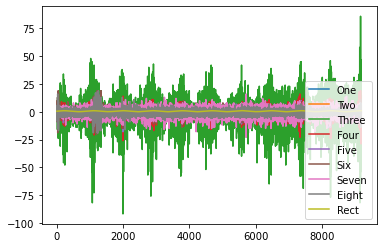

In [6]:
df.plot()

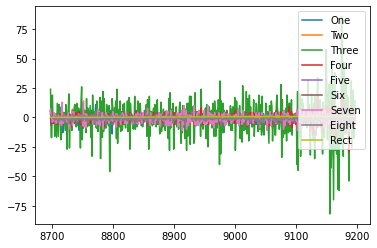

In [7]:
df.tail(500).plot()

We can see very large values for data with an index of over 9100. 

In [8]:
df[df.index > 9100].std()

One       2.546067
Two       4.817992
Three    28.005918
Four      7.150880
Five      3.626641
Six       3.825454
Seven     4.215768
Eight     3.040786
Rect      0.057318
dtype: float64

In [9]:
df[df.index < 9100].std()

One       2.053482
Two       2.336685
Three    11.106668
Four      3.090884
Five      2.359493
Six       3.230371
Seven     3.516407
Eight     2.487111
Rect      0.287311
dtype: float64

To stop the press, I had to press the spacebar. I believe readings after 9100, were from me pressing the spacebar and therefore can be removed.

In [10]:
df = df[df.index < 9100]

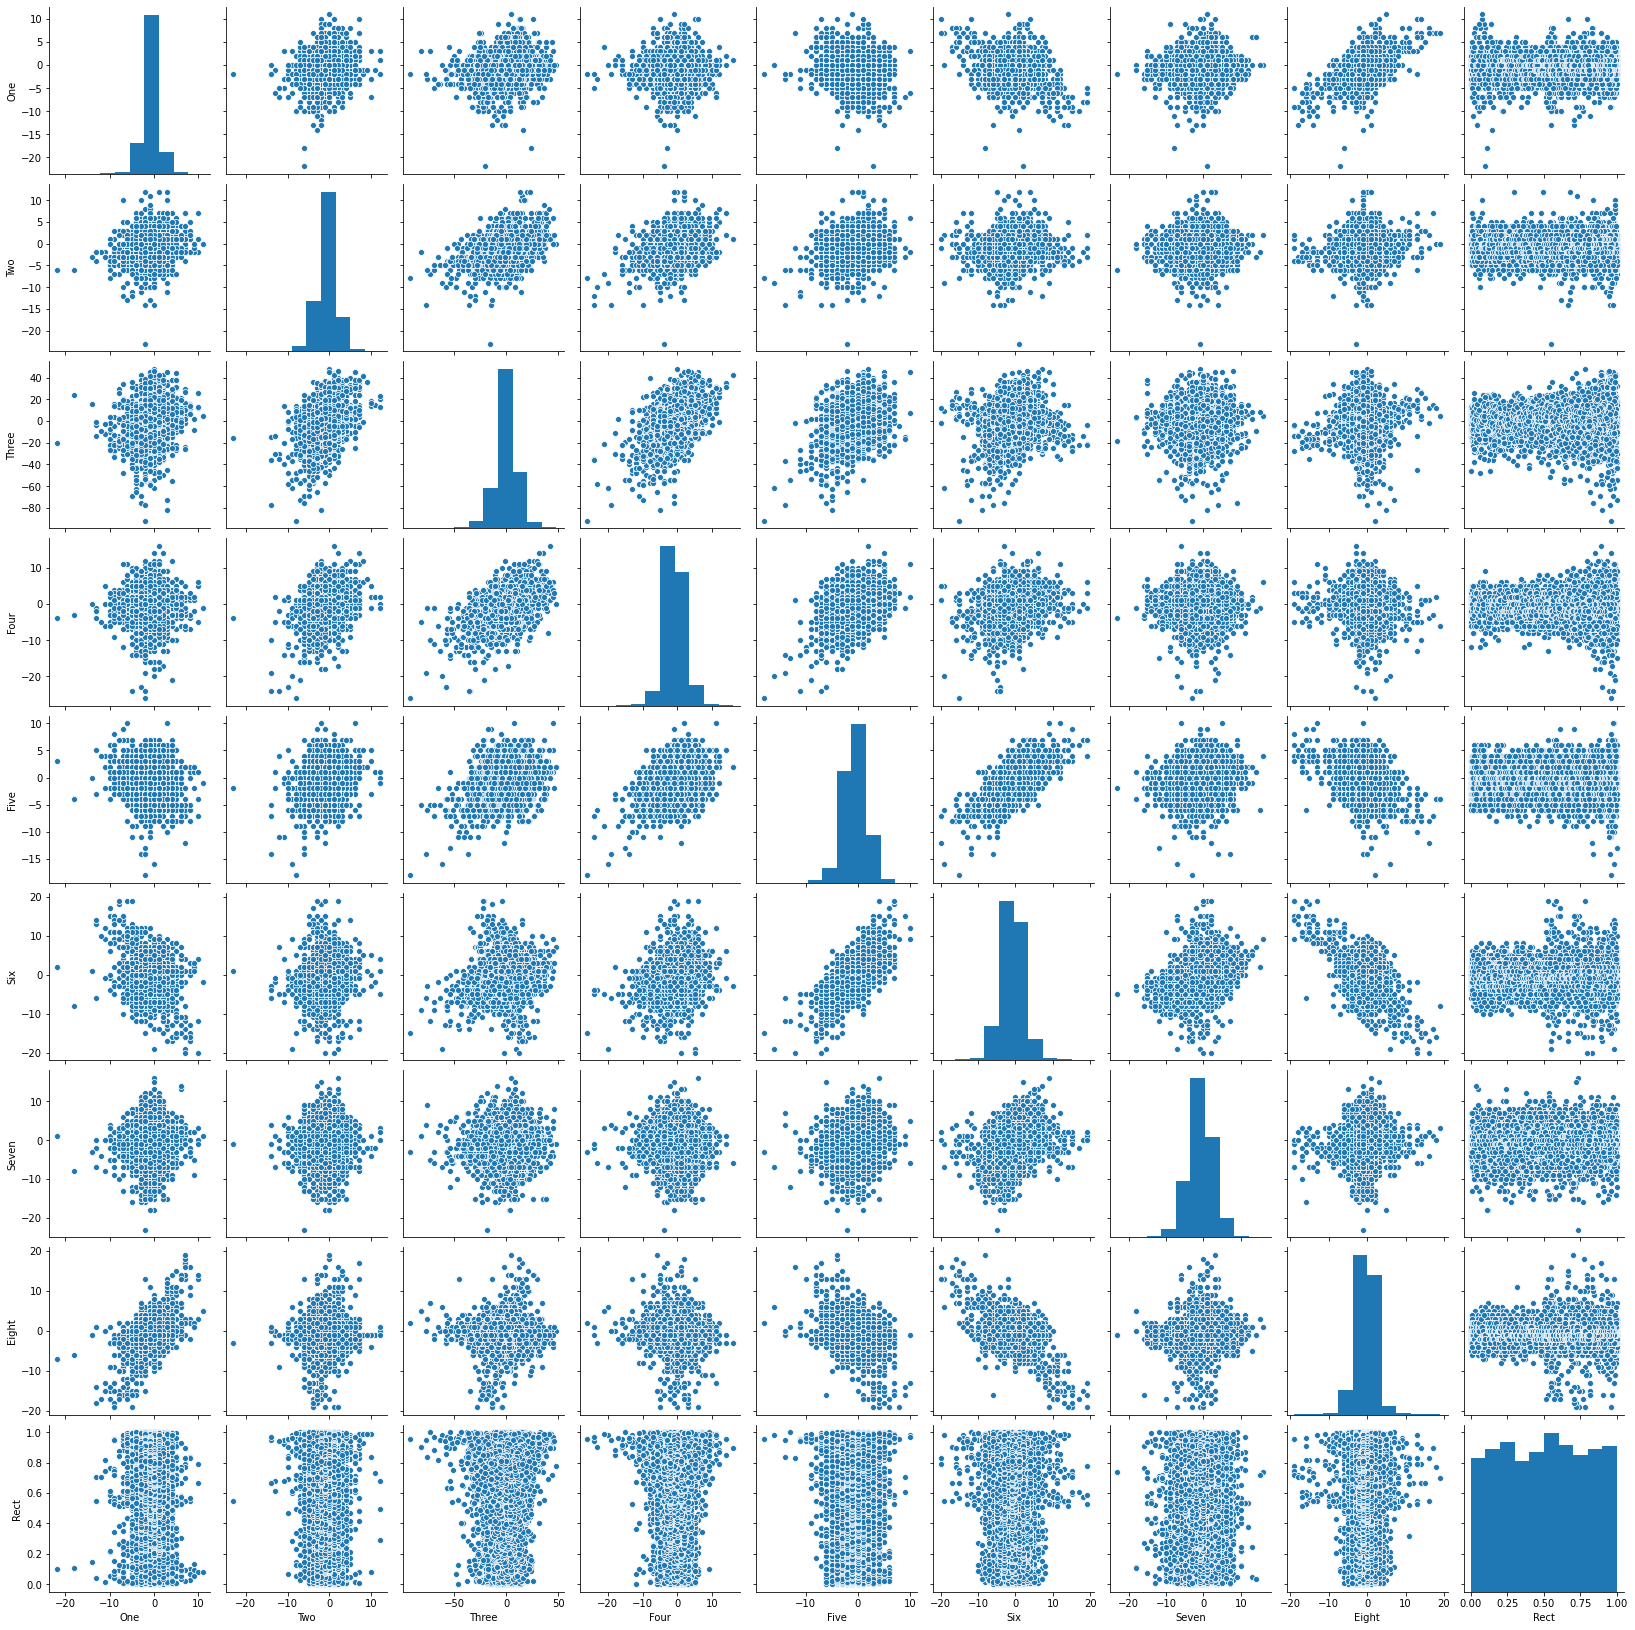

In [11]:
sns.pairplot(df)

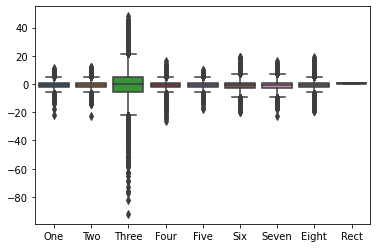

In [12]:
sns.boxplot(data=df)

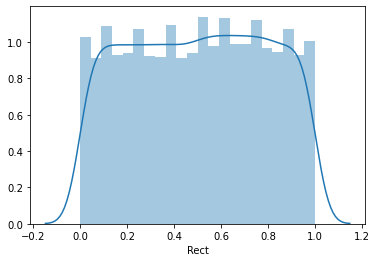

In [13]:
sns.distplot(df['Rect'])

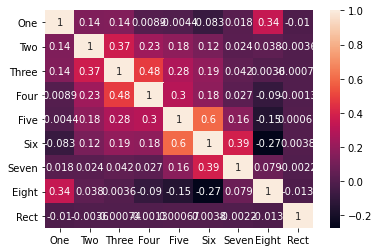

In [14]:
sns.heatmap(df.corr(), annot=True)

## PCA

In [15]:
X = df.drop(['Rect'],1).values
y = df['Rect'].values

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

In [17]:
pd.DataFrame(X_scaled).describe()

0             1             2             3             4  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean   1.703399e-16  1.084846e-16 -7.747161e-19 -1.839310e-16  3.744715e-17   
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   
min   -1.037892e+01 -9.486439e+00 -8.216979e+00 -8.176745e+00 -7.272123e+00   
25%   -6.388323e-01 -4.988556e-01 -4.734571e-01 -4.115483e-01 -4.906333e-01   
50%   -1.518277e-01 -7.087540e-02  6.678862e-02 -8.799845e-02 -6.679022e-02   
75%    8.221815e-01  7.850849e-01  5.169934e-01  5.591013e-01  7.808960e-01   
max    5.692227e+00  5.492867e+00  4.388754e+00  5.412349e+00  4.595484e+00   

                  5             6             7  
count  9.100000e+03  9.100000e+03  9.100000e+03  
mean  -6.335668e-17 -5.266544e-17 -4.410879e-16  
std    1.000055e+00  1.000055e+00  1.000055e+00  
min   -5.928268e+00 -6.328580e+00 -7.342167e+00  
25%   -6.654248e-01 -6.406430e-01 -5.065513e-01  
50%   -4.626675e-02 -7.184927e-02 -1.044563e-01  
75%    5.728913e-01  4.969444e-01  6.997337e-01  
max    6.145313e+00  4.762897e+00  7.937444e+00

In [18]:
principal_df['Y'] = df['Rect']

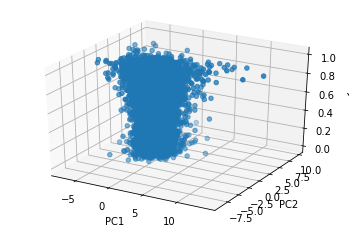

In [19]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], principal_df['Y'])
threedee.set_xlabel('PC1')
threedee.set_ylabel('PC2')
threedee.set_zlabel('Y')
plt.show();

In [20]:
pca.explained_variance_ratio_

array([0.28747933, 0.19433928])

## The dimention with the greatest variance

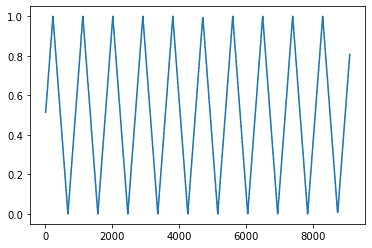

In [21]:
df['Rect'].plot()

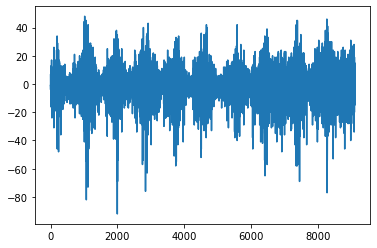

In [22]:
df['Three'].plot()

In [23]:
simple_df = df[['Three','Rect']]
simple_df['Three']

0      -1.0
1      -1.0
2      -4.0
3       7.0
4      -2.0
       ... 
9095   -1.0
9096   -5.0
9097    2.0
9098    0.0
9099   -5.0
Name: Three, Length: 9100, dtype: float64

<IPython.core.display.Javascript object>


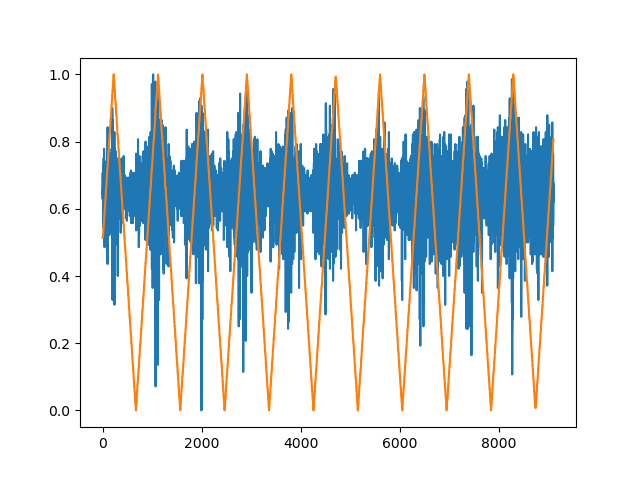

In [24]:
%matplotlib notebook
normalized_df=(df['Three']-df['Three'].min())/(df['Three'].max()-df['Three'].min())
normalized_df.plot()

In [26]:
df['Rect'].plot()

# Min Max Scaling 

In [28]:
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_s = pd.DataFrame(x_scaled)

<IPython.core.display.Javascript object>


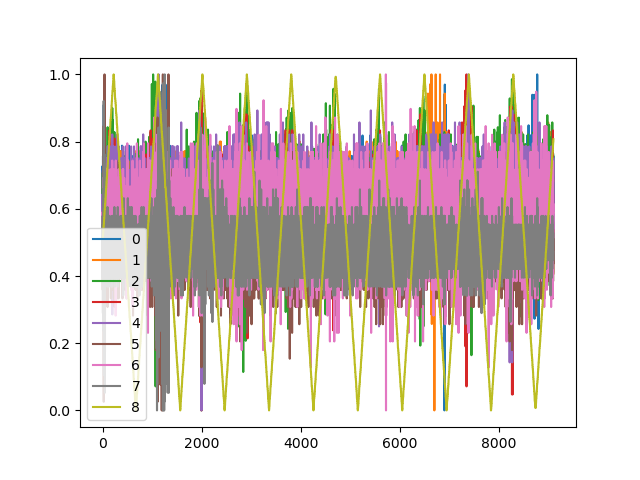

In [29]:
df_s.plot()

## Which channel explains swiping left?

<IPython.core.display.Javascript object>


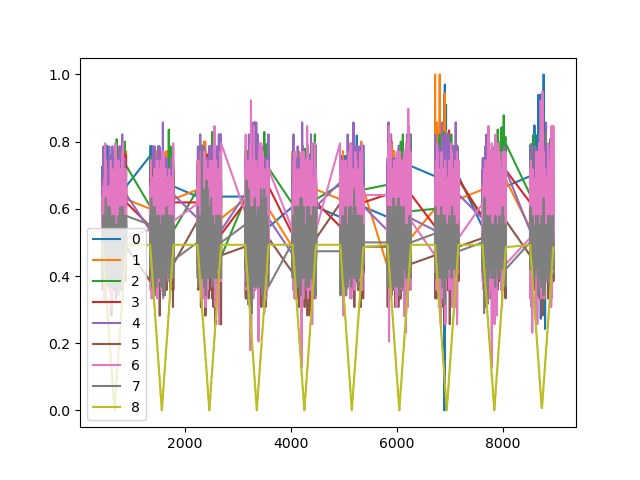

In [35]:
left = df[df['Rect'] < 0.5]
right = df[df['Rect'] < 0.5]

left_s = df_s[df['Rect'] < 0.5]
right_s = df_s[df['Rect'] < 0.5]

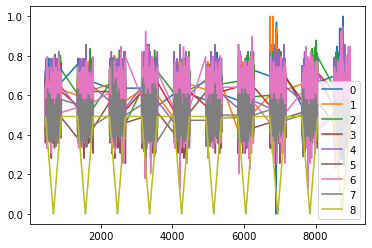

In [39]:
left_s.plot()

In [55]:
right_s.describe()

0            1            2            3            4  \
count  4444.000000  4444.000000  4444.000000  4444.000000  4444.000000   
mean      0.646796     0.633458     0.651953     0.601614     0.612383   
std       0.060132     0.061360     0.059260     0.055592     0.075767   
min       0.000000     0.371429     0.314286     0.333333     0.321429   
25%       0.606061     0.600000     0.621429     0.571429     0.571429   
50%       0.636364     0.628571     0.657143     0.595238     0.607143   
75%       0.666667     0.685714     0.685714     0.642857     0.678571   
max       1.000000     1.000000     0.878571     0.833333     0.857143   

                 5            6            7            8  
count  4444.000000  4444.000000  4444.000000  4444.000000  
mean      0.490122     0.570819     0.481726     0.247991  
std       0.068791     0.090188     0.050598     0.143197  
min       0.256410     0.128205     0.289474     0.000000  
25%       0.435897     0.512821     0.447368     0.121429  
50%       0.487179     0.564103     0.473684     0.250000  
75%       0.538462     0.615385     0.500000     0.371429  
max       0.717949     0.948718     0.789474     0.492857

In [52]:
left_s.var()

0    0.003616
1    0.003765
2    0.003512
3    0.003090
4    0.005741
5    0.004732
6    0.008134
7    0.002560
8    0.020505
dtype: float64

Channel 6 has the highest variance for left rotations. 

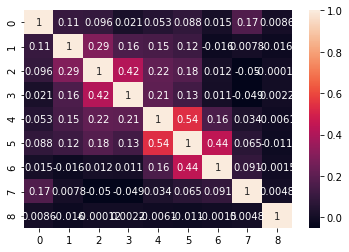

In [38]:
%matplotlib inline
sns.heatmap(left_s.corr(), annot=True)

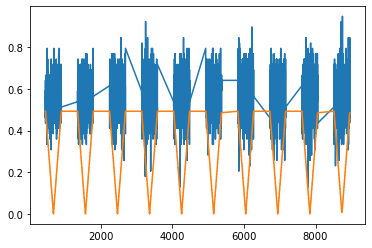

In [53]:
plt.plot(left_s[6])
plt.plot(left_s[8])

# Making a bench mark model

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
simple_model_preds = df['Three'] / max(df['Three'])

In [51]:
simple_model_preds

0      -0.011628
1      -0.011628
2      -0.046512
3       0.081395
4      -0.023256
          ...   
9192   -0.034884
9193    0.267442
9194   -0.127907
9195   -0.209302
9196    0.162791
Name: Three, Length: 9197, dtype: float64

In [50]:
mae = metrics.mean_absolute_error(df['Rect'], simple_model_preds)
mse = metrics.mean_squared_error(df['Rect'], simple_model_preds)
rmse = np.sqrt(metrics.mean_squared_error(df['Rect'], simple_model_preds))
r2_square = metrics.r2_score(df['Rect'], simple_model_preds)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)

MAE: 0.5187433284795671
MSE: 0.36664109502648673
RMSE: 0.6055089553643999
R2 Square -3.3917274589832616


## Making a benchmark Linear Regression model

In [37]:
lin_reg = LinearRegression(normalize=False)
lin_reg.fit(X_train,y_train)

LinearRegression()

In [38]:
pred = lin_reg.predict(X_test)

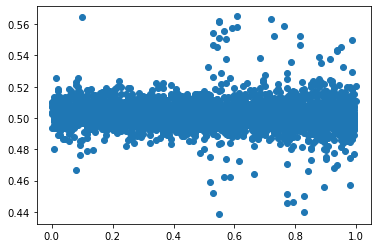

In [39]:
plt.figure()
plt.scatter(y_test.reshape(-1,1), pred.reshape(-1,1))

In [40]:
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
r2_square = metrics.r2_score(y_test, pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)

MAE: 0.2498019963887384
MSE: 0.08329018213463002
RMSE: 0.28860038484837475
R2 Square -0.005588561880847331


# Ridge Regression

In [60]:
from sklearn.linear_model import Ridge

# Split our data into features and what we want to predict
X = df.drop(['Rect'],1).values.astype(float)
y = df['Rect'].values.astype(float)

ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

# Use our model to make predictions
pred = ridge_model.predict(X_test)

# Calculate our metrics
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
r2_square = metrics.r2_score(y_test, pred)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)

MAE: 0.248650331277258
MSE: 0.08302386417637751
RMSE: 0.28813861972387095
R2 Square -0.0026667725869713443
